In [101]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time

##import libraries for ANN

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.models import Sequential

In [102]:
## warning
import warnings
warnings.filterwarnings('ignore')

In [103]:
## load my dataset
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.640000,C1231006815,170136.000000,160296.360000,M1979787155,0.000000,0.000000,0,0
1,1,PAYMENT,1864.280000,C1666544295,21249.000000,19384.720000,M2044282225,0.000000,0.000000,0,0
2,1,TRANSFER,181.000000,C1305486145,181.000000,0.000000,C553264065,0.000000,0.000000,1,0
3,1,CASH_OUT,181.000000,C840083671,181.000000,0.000000,C38997010,21182.000000,0.000000,1,0
4,1,PAYMENT,11668.140000,C2048537720,41554.000000,29885.860000,M1230701703,0.000000,0.000000,0,0


In [104]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

I'VE CREATED TWO DIFFERENT COLUMNS TO OBSERVE IF THERE'S ANY PATTERNS THAT REVEAL ANY CORELATION BETWEEN THE AMOUNTS TRANSFERRED AND/OR RECEIVED AND THE FRAUD EVENT.
THIS WILL ALLOW US TO CREATE A HEATMAP AND OBSERVE THE CORELATION.

In [105]:
df['balanceOrigDifference'] = df['oldbalanceOrg'] - df['newbalanceOrig']

In [106]:
df['balanceDestDifference'] = df['oldbalanceDest'] - df['newbalanceDest']

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   step                   int64  
 1   type                   object 
 2   amount                 float64
 3   nameOrig               object 
 4   oldbalanceOrg          float64
 5   newbalanceOrig         float64
 6   nameDest               object 
 7   oldbalanceDest         float64
 8   newbalanceDest         float64
 9   isFraud                int64  
 10  isFlaggedFraud         int64  
 11  balanceOrigDifference  float64
 12  balanceDestDifference  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 631.1+ MB


In [108]:
pd.set_option('display.float_format', '{:.2f}'.format) ## telling Pandas to format floating-point numbers with two decimal places
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDifference,balanceDestDifference
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00,-21230.56,-124294.73
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00,146643.29,812939.08
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1915267.90,-105687838.82
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-149105.43
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00,10150.44,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00,10000000.00,13060826.21


In [109]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDifference,balanceDestDifference
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00,21182.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14,0.00
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0,7817.71,0.00
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0,7107.77,0.00
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0,7861.64,0.00
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.00,0.00,0,0,2671.00,0.00
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.00,40348.79,0,0,5337.77,1549.21


In [110]:
crosstab_result = pd.crosstab(df['type'], df['isFraud'])
print(crosstab_result)

isFraud         0     1
type                   
CASH_IN   1399284     0
CASH_OUT  2233384  4116
DEBIT       41432     0
PAYMENT   2151495     0
TRANSFER   528812  4097


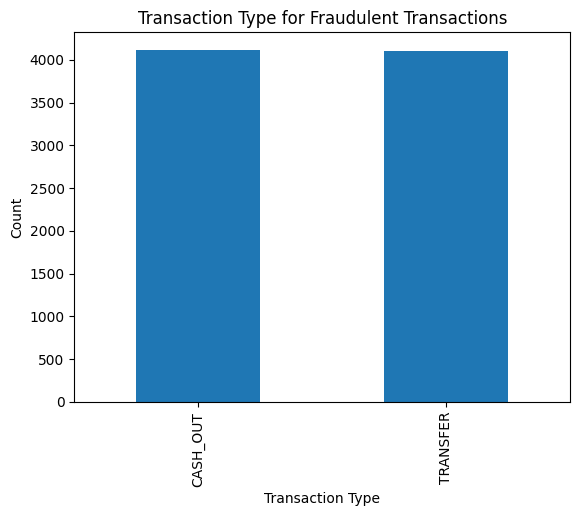

In [111]:
# Filter the DataFrame to include only fraudulent transactions
fraudulent_data = df[df['isFraud'] == 1]

# bar plot to visualize the distribution of transaction types for fraud
fraudulent_data['type'].value_counts().plot(kind='bar')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Type for Fraudulent Transactions')
plt.show()

NO PATTERN SEEN HERE TO CORELATE THE ORIGINATOR'S NAME WITH A HIGHER NUMBER OF FRAUD OCCURENCES

In [112]:
## crosstab_result = pd.crosstab(df['nameOrig'], df['isFraud'])
## print(crosstab_result)

NO OBVIOUS PATTERNS SEEN HERE TO CORELATE THE DESTINATION'S NAME WITH A HIGHER NUMBER OF FRAUD OCCURENCES. WE HAVE A MAXIMUM OF 2 OCCURENCES, BUT LATER ON WE MIGHT REMOVE ALL ROWS WITH
LESS THAN 2 OCCURENCES FOR "isFRAUD"

In [113]:
# Group by 'nameOrig' and aggregate 'isFraud' counts
fraud_count_by_nameOrig = df.groupby('nameDest')['isFraud'].sum()

# Sort the result in descending order to see the highest fraud counts first
sorted_fraud_count = fraud_count_by_nameOrig.sort_values(ascending=False)

# Display the top 'n' nameOrig values with the most fraud counts (e.g., top 10)
n = 20
print(sorted_fraud_count.head(n))

nameDest
C1366192319    2
C1460854172    2
C1193568854    2
C650699445     2
C505532836     2
C2129197098    2
C200064275     2
C1780714769    2
C1185292292    2
C1259079602    2
C904300960     2
C410033330     2
C1650668671    2
C385133759     2
C1981613973    2
C935310781     2
C1655359478    2
C1827800010    2
C14138104      2
C686334805     2
Name: isFraud, dtype: int64


In [114]:

# Calculate the number of 'True' values for each 'nameDest'
fraud_count_by_nameDest = df.groupby('nameDest')['isFraud'].sum()

# Create a mask for 'nameDest' values with at least two 'True' values
mask_0 = fraud_count_by_nameDest >= 2

# Count the number of 'nameDest' values that meet the condition
count_of_nameDest_with_true = mask_0.sum()
count_of_nameDest_with_true


44

In [115]:

# Calculate the number of 'True' values for each 'nameDest'
fraud_count_by_nameDest = df.groupby('nameDest')['isFraud'].sum()

# Create a mask for 'nameDest' values with at least two 'True' values
mask_0 = (fraud_count_by_nameDest >= 1) & (fraud_count_by_nameDest < 2)

# Count the number of 'nameDest' values that meet the condition
count_of_nameDest_with_true = mask_0.sum()
count_of_nameDest_with_true


8125

NO PATTERN SEEN HERE TO CORELATE THE ORIGINATOR'S NAME WITH A HIGHER NUMBER OF FRAUD OCCURENCES

In [116]:
# Group by 'nameOrig' and aggregate 'isFraud' counts
fraud_count_by_nameOrig = df.groupby('nameOrig')['isFraud'].sum()

# Sort the result in descending order to see the highest fraud counts first
sorted_fraud_count = fraud_count_by_nameOrig.sort_values(ascending=False)

# Display the top 'n' nameOrig values with the most fraud counts (e.g., top 10)
n = 500
print(sorted_fraud_count.head(n))

nameOrig
C1998644906    1
C43271707      1
C2052061131    1
C1521962059    1
C853796614     1
              ..
C631988661     1
C1206710867    1
C491289068     1
C1128269552    1
C221305576     1
Name: isFraud, Length: 500, dtype: int64


In [117]:
df.isnull().sum()

step                     0
type                     0
amount                   0
nameOrig                 0
oldbalanceOrg            0
newbalanceOrig           0
nameDest                 0
oldbalanceDest           0
newbalanceDest           0
isFraud                  0
isFlaggedFraud           0
balanceOrigDifference    0
balanceDestDifference    0
dtype: int64

THE "isFlaggedFraud" column seems to be irrelevant. From 8,213 occurences of Fraud, it predicted only 16. So we can drop this column.

In [118]:
value_counts = df['isFlaggedFraud'].value_counts()
print(value_counts)

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


In [119]:
value_counts = df['isFraud'].value_counts()
print(value_counts)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


NOW THAT I KNOW THAT THE COLUMNS isFlaggedFraud", "nameOrig" AND "nameDest" DO NOT SHOW ANY STRONG CORELATION ITH THE FRAUD EVENT, I'VE DECIDED TO DROP THEM.

In [120]:
columns_to_drop = ['isFlaggedFraud', 'nameOrig', 'nameDest']
df = df.drop(columns=columns_to_drop)


In [121]:
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceOrigDifference,balanceDestDifference
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,9839.64,0.00
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,1864.28,0.00
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,181.00,21182.00
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,11668.14,0.00
5,1,PAYMENT,7817.71,53860.00,46042.29,0.00,0.00,0,7817.71,0.00
6,1,PAYMENT,7107.77,183195.00,176087.23,0.00,0.00,0,7107.77,0.00
7,1,PAYMENT,7861.64,176087.23,168225.59,0.00,0.00,0,7861.64,0.00
8,1,PAYMENT,4024.36,2671.00,0.00,0.00,0.00,0,2671.00,0.00
9,1,DEBIT,5337.77,41720.00,36382.23,41898.00,40348.79,0,5337.77,1549.21


THE ONLY TYPE OF TRANSACTIONS AFFECTED BY FRAUD IN OUR DATA SET ARE: CASH_OUT AND TRANSFER. SO WE'VE DECIDE TO DROP ALL OTHER TYPES OF TRANSACTIONS BECAUSE WE ARE INTERESTED IN PREDICTING 
FRAUD AND THERE'S NO POINT TRAINING THE MODEL WITH TYPE OF TRANSACTIONS THAT NEVER HEAD A TRUE VALUE FOR "IS FRAUD", THAT WOULD CREATE AN IMBALANCED DATASET.
WE ARE NOW LEFT WITH ONLY 2,7 MILLION ROWS FROM OVER 6 MILLION.

In [122]:
# Create a boolean mask for rows with specified values in the 'type' column
mask = df['type'].isin(['CASH_IN', 'DEBIT', 'PAYMENT'])

# Use the mask to drop the rows with the specified values
df = df[~mask]
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceOrigDifference,balanceDestDifference
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,181.00,21182.00
15,1,CASH_OUT,229133.94,15325.00,0.00,5083.00,51513.44,0,15325.00,-46430.44
19,1,TRANSFER,215310.30,705.00,0.00,22425.00,0.00,0,705.00,22425.00
24,1,TRANSFER,311685.89,10835.00,0.00,6267.00,2719172.89,0,10835.00,-2712905.89
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,339682.13,-339682.13
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,6311409.28,0.00
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,6311409.28,-6311409.27
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,850002.52,0.00


I NEED TO CREATE ONE HOT ENCODING FOR THE TWO REMAINING TYPES OF TRANSACTIONS IN MY DATASET: TRANSFER AND CASH_OUT

In [123]:
df = pd.get_dummies(df, columns=['type'], prefix='type')
df.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceOrigDifference,balanceDestDifference,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,181.00,21182.00,True,False
15,1,229133.94,15325.00,0.00,5083.00,51513.44,0,15325.00,-46430.44,True,False
19,1,215310.30,705.00,0.00,22425.00,0.00,0,705.00,22425.00,False,True
24,1,311685.89,10835.00,0.00,6267.00,2719172.89,0,10835.00,-2712905.89,False,True
42,1,110414.71,26845.41,0.00,288800.00,2415.16,0,26845.41,286384.84,True,False
47,1,56953.90,1942.02,0.00,70253.00,64106.18,0,1942.02,6146.82,True,False
48,1,5346.89,0.00,0.00,652637.00,6453430.91,0,0.00,-5800793.91,True,False
51,1,23261.30,20411.53,0.00,25742.00,0.00,0,20411.53,25742.00,True,False
58,1,62610.80,79114.00,16503.20,517.00,8383.29,0,62610.80,-7866.29,False,True


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770409 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   step                   int64  
 1   amount                 float64
 2   oldbalanceOrg          float64
 3   newbalanceOrig         float64
 4   oldbalanceDest         float64
 5   newbalanceDest         float64
 6   isFraud                int64  
 7   balanceOrigDifference  float64
 8   balanceDestDifference  float64
 9   type_CASH_OUT          bool   
 10  type_TRANSFER          bool   
dtypes: bool(2), float64(7), int64(2)
memory usage: 216.6 MB


<Axes: >

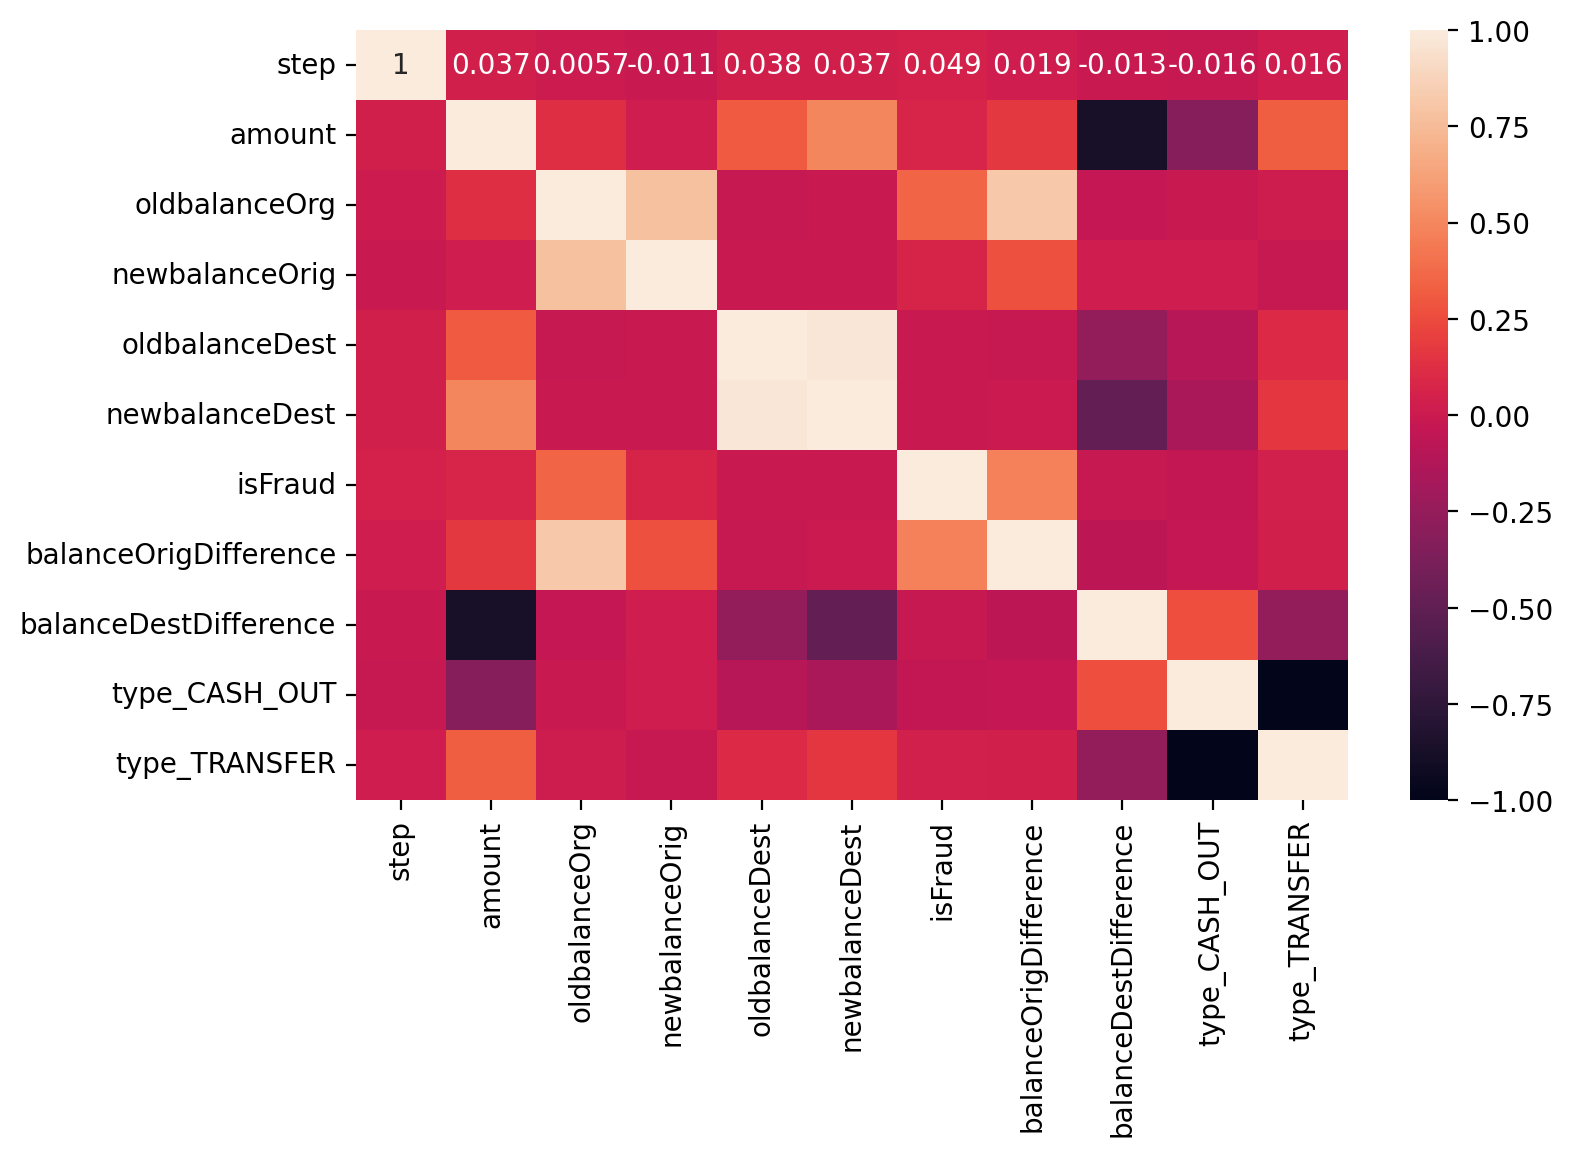

In [124]:
plt.figure(figsize=(8,5),dpi=200)
sns.heatmap(df.corr(), annot = True)

In [125]:
df.corr()
## As "balanceOrigDifference" increases, the likelihood of "isFraud" increases. This suggests that higher "balanceOrigDifference" values are more likely to be associated with fraud 0.47
## As "oldbalanceOrg" increases, the likelihood of "isFraud" also increases

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceOrigDifference,balanceDestDifference,type_CASH_OUT,type_TRANSFER
step,1.00,0.04,0.01,-0.01,0.04,0.04,0.05,0.02,-0.01,-0.02,0.02
amount,0.04,1.00,0.12,0.02,0.31,0.50,0.07,0.17,-0.87,-0.33,0.33
oldbalanceOrg,0.01,0.12,1.00,0.78,-0.02,-0.01,0.35,0.82,-0.03,-0.01,0.01
newbalanceOrig,-0.01,0.02,0.78,1.00,-0.01,-0.02,0.06,0.27,0.02,0.02,-0.02
oldbalanceDest,0.04,0.31,-0.02,-0.01,1.00,0.97,-0.01,-0.02,-0.26,-0.10,0.10
newbalanceDest,0.04,0.50,-0.01,-0.02,0.97,1.00,-0.01,-0.00,-0.49,-0.16,0.16
isFraud,0.05,0.07,0.35,0.06,-0.01,-0.01,1.00,0.47,-0.02,-0.04,0.04
balanceOrigDifference,0.02,0.17,0.82,0.27,-0.02,-0.00,0.47,1.00,-0.07,-0.04,0.04
balanceDestDifference,-0.01,-0.87,-0.03,0.02,-0.26,-0.49,-0.02,-0.07,1.00,0.27,-0.27
type_CASH_OUT,-0.02,-0.33,-0.01,0.02,-0.10,-0.16,-0.04,-0.04,0.27,1.00,-1.00


In [126]:
df.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceOrigDifference,balanceDestDifference,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,181.00,21182.00,True,False
15,1,229133.94,15325.00,0.00,5083.00,51513.44,0,15325.00,-46430.44,True,False
19,1,215310.30,705.00,0.00,22425.00,0.00,0,705.00,22425.00,False,True
24,1,311685.89,10835.00,0.00,6267.00,2719172.89,0,10835.00,-2712905.89,False,True
42,1,110414.71,26845.41,0.00,288800.00,2415.16,0,26845.41,286384.84,True,False
47,1,56953.90,1942.02,0.00,70253.00,64106.18,0,1942.02,6146.82,True,False
48,1,5346.89,0.00,0.00,652637.00,6453430.91,0,0.00,-5800793.91,True,False
51,1,23261.30,20411.53,0.00,25742.00,0.00,0,20411.53,25742.00,True,False
58,1,62610.80,79114.00,16503.20,517.00,8383.29,0,62610.80,-7866.29,False,True


LOGISTIC REGRESSION

In [127]:
X = df.drop('isFraud', axis=1)  # Features (independent variables)
y = df['isFraud']  # Target variable (dependent variable)

In [128]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [130]:

# Create and fit a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [131]:
y_pred = model.predict(X_test_scaled)

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [133]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.9983377911572655
Precision: 0.9014396456256921
Recall: 0.4945321992709599
F1-Score: 0.6386818360141232


In [134]:
## make prediction
LR_pred = model.predict(X_test_scaled)

In [135]:
## PUTTING THE ACTUAL AND PREDICTED IN A DATAFRAME
pd.DataFrame({'Actual': y_test, 'Predicted': LR_pred})

,Actual,Predicted
1442460,0,0
5847267,0,0
2163940,0,0
2689116,0,0
1452693,0,0
...,...,...
4635707,0,0
494928,0,0
1775442,0,0
3159760,0,0


In [136]:
## model evaluation
accuracy_LR = accuracy_score(y_test, LR_pred )

## confusion matrix
conf_mat = confusion_matrix(y_test, LR_pred)


print(accuracy_LR)
print(conf_mat)

0.9983377911572655
[[552347     89]
 [   832    814]]


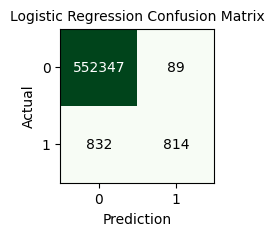

In [137]:
## confusion matrix plot
fig, ax = plot_confusion_matrix(conf_mat, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('Logistic Regression Confusion Matrix', fontsize = 10)
plt.show()

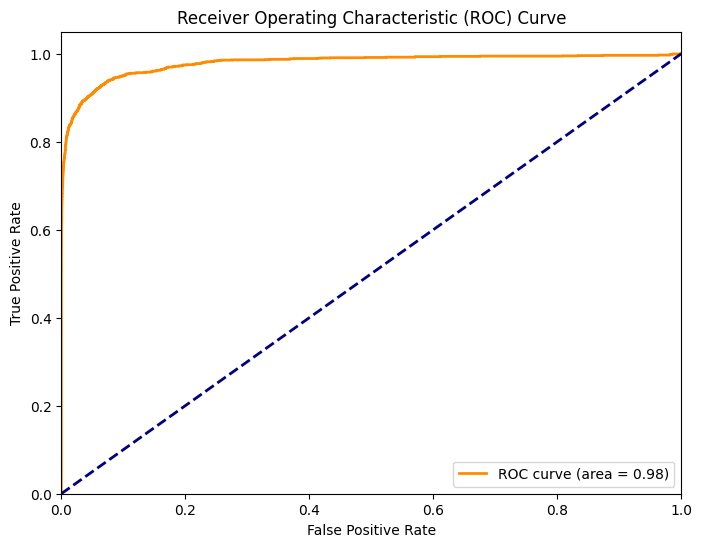

In [138]:
auc_LR = roc_auc_score(y_test, LR_pred)
probabilities = model.predict_proba(X_test_scaled)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, probabilities, pos_label=1)
roc_auc = roc_auc_score(y_test, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [139]:
## classification report
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.90      0.49      0.64      1646

    accuracy                           1.00    554082
   macro avg       0.95      0.75      0.82    554082
weighted avg       1.00      1.00      1.00    554082



RANDOM FOREST

In [140]:
'''

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the model on the training data
random_forest.fit(X_train_scaled, y_train)  # X_train should contain your features, y_train your labels (isFraud)

'''




'\n\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\n\n# Create a Random Forest classifier\nrandom_forest = RandomForestClassifier(n_estimators=100, random_state=42)\n\n\n# Train the model on the training data\nrandom_forest.fit(X_train_scaled, y_train)  # X_train should contain your features, y_train your labels (isFraud)\n\n'

In [141]:
'''# Make predictions on the test data
y_pred = random_forest.predict(X_test_scaled)  # X_test should contain your test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report for Random Forest:")
print(class_report)
'''

'# Make predictions on the test data\ny_pred = random_forest.predict(X_test_scaled)  # X_test should contain your test data\n\n# Evaluate the model\naccuracy = accuracy_score(y_test, y_pred)\nprecision = precision_score(y_test, y_pred)\nrecall = recall_score(y_test, y_pred)\nf1 = f1_score(y_test, y_pred)\n\n# Print evaluation metrics\nprint(f\'Accuracy: {accuracy}\')\nprint(f\'Precision: {precision}\')\nprint(f\'Recall: {recall}\')\nprint(f\'F1-Score: {f1}\')\n\n# Generate a classification report\nclass_report = classification_report(y_test, y_pred)\n\n# Print the classification report\nprint("Classification Report for Random Forest:")\nprint(class_report)\n'

In [142]:
'''## classification report
print(classification_report(y_test, y_pred))'''

'## classification report\nprint(classification_report(y_test, y_pred))'

SUPPORT VECTOR MACHINE SVM

In [143]:
'''clflinear = svm.SVC(kernel = 'linear')
clfsigmoid = svm.SVC(kernel = 'sigmoid')
clfrbf = svm.SVC(kernel = 'rbf')'''

"clflinear = svm.SVC(kernel = 'linear')\nclfsigmoid = svm.SVC(kernel = 'sigmoid')\nclfrbf = svm.SVC(kernel = 'rbf')"

In [144]:
'''## fit the model
start_time = time.time()

clflinear.fit(X_train, y_train)
clfsigmoid.fit(X_train, y_train)
clfrbf.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time} seconds")'''

'## fit the model\nstart_time = time.time()\n\nclflinear.fit(X_train, y_train)\nclfsigmoid.fit(X_train, y_train)\nclfrbf.fit(X_train, y_train)\n\nend_time = time.time()\nelapsed_time = end_time - start_time\nprint(f"Training time: {elapsed_time} seconds")'

In [145]:
'''y_pred_linear = clflinear.predict(X_test)
y_pred_sigmoid = clfsigmoid.predict(X_test)
y_pred_rbf = clfrbf.predict(X_test)'''

'y_pred_linear = clflinear.predict(X_test)\ny_pred_sigmoid = clfsigmoid.predict(X_test)\ny_pred_rbf = clfrbf.predict(X_test)'

In [146]:
'''y_pred_linear = [int(label) for label in y_pred_linear]
y_pred_sigmoid = [int(label) for label in y_pred_sigmoid]
y_pred_rbf = [int(label) for label in y_pred_rbf]

print('Accuracy(Linear Kernel):', metrics.accuracy_score(y_test, y_pred_linear))
print('Accuracy(Sigmoid Kernel):', metrics.accuracy_score(y_test, y_pred_sigmoid))
print('Accuracy(RBF Kernel):', metrics.accuracy_score(y_test, y_pred_rbf))

print(classification_report(y_test, y_pred_sigmoid))'''


"y_pred_linear = [int(label) for label in y_pred_linear]\ny_pred_sigmoid = [int(label) for label in y_pred_sigmoid]\ny_pred_rbf = [int(label) for label in y_pred_rbf]\n\nprint('Accuracy(Linear Kernel):', metrics.accuracy_score(y_test, y_pred_linear))\nprint('Accuracy(Sigmoid Kernel):', metrics.accuracy_score(y_test, y_pred_sigmoid))\nprint('Accuracy(RBF Kernel):', metrics.accuracy_score(y_test, y_pred_rbf))\n\nprint(classification_report(y_test, y_pred_sigmoid))"

In [147]:
## DECISION TREE /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


from sklearn.tree import DecisionTreeClassifier

## decision tree
## creating a decision tree with criteria gini with no max depth
decision_tree_gini = DecisionTreeClassifier()

## creating a decision tree with criteria Entropy with no max depth
decision_tree_entropy = DecisionTreeClassifier(criterion='entropy')

## max depth of 3
decision_tree_depth = DecisionTreeClassifier(max_depth=3)

start_time = time.time()

## fit our model
decision_tree_gini.fit(X_train, y_train)
decision_tree_entropy.fit(X_train, y_train)
decision_tree_depth.fit(X_train, y_train)

## make predictions
y_pred_gini = decision_tree_gini.predict(X_test)
y_pred_entropy = decision_tree_entropy.predict(X_test)
y_pred_depth = decision_tree_depth.predict(X_test)

## model evaluation
print('Accuracy(Gini):', metrics.accuracy_score(y_test, y_pred_gini))
print('Accuracy(Entropy):', metrics.accuracy_score(y_test, y_pred_entropy))
print('Accuracy(Max Depth):', metrics.accuracy_score(y_test, y_pred_depth))

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time} seconds")

Accuracy(Gini): 0.9993304240166618
Accuracy(Entropy): 0.9993972011362939
Accuracy(Max Depth): 0.9985507560252814
Training time: 117.33418679237366 seconds


Training Accuracy (ENTROPY): 1.0


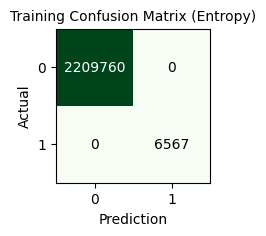

[[2209760       0]
 [      0    6567]]


In [161]:
# Make predictions on the training data
y_pred_entropy_TRAIN = decision_tree_entropy.predict(X_train)
# Create DataFrames to display actual and predicted values
train_result_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_entropy_TRAIN})
# Model evaluation - Calculate training accuracy
accuracy_train_ENTROPY = accuracy_score(y_train, y_pred_entropy_TRAIN)
# Confusion matrix for training and test data
conf_mat_train_ENTROPY = confusion_matrix(y_train, y_pred_entropy_TRAIN)
# Display training and test accuracy
print("Training Accuracy (ENTROPY):", accuracy_train_ENTROPY)
# Confusion matrix plot for training and test data
fig, ax = plot_confusion_matrix(conf_mat_train_ENTROPY, figsize=(2, 2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize=10)
plt.ylabel('Actual', fontsize=10)
plt.title('Training Confusion Matrix (Entropy)', fontsize=10)
plt.show()
print(conf_mat_train_ENTROPY)

0.9993304240166618
0.9993972011362939
0.9985507560252814
[[552259    177]
 [   194   1452]]
[[552285    151]
 [   183   1463]]
[[552155    281]
 [   522   1124]]


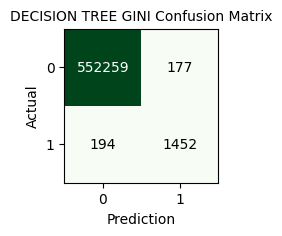

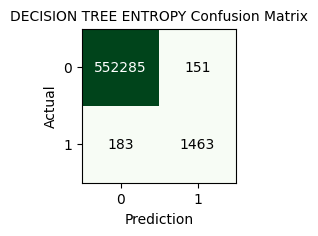

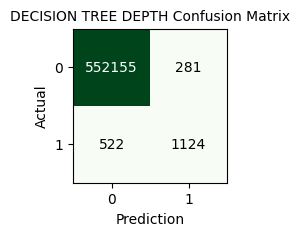

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.89      0.88      0.89      1646

    accuracy                           1.00    554082
   macro avg       0.95      0.94      0.94    554082
weighted avg       1.00      1.00      1.00    554082

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.91      0.89      0.90      1646

    accuracy                           1.00    554082
   macro avg       0.95      0.94      0.95    554082
weighted avg       1.00      1.00      1.00    554082

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.80      0.68      0.74      1646

    accuracy                           1.00    554082
   macro avg       0.90      0.84      0.87    554082
weighted avg       1.00      1.00      1.00    554082



In [148]:
## model evaluation DECISION TREE
accuracy_DT_GINI = accuracy_score(y_test, y_pred_gini )
accuracy_DT_ENTROPY = accuracy_score(y_test,y_pred_entropy )
accuracy_DT_DEPTH = accuracy_score(y_test, y_pred_depth )

## confusion matrix DECISION TREE
conf_mat_DT_GINI = confusion_matrix(y_test, y_pred_gini)
conf_mat_DT_ENTROPY = confusion_matrix(y_test, y_pred_entropy)
conf_mat_DT_DEPTH = confusion_matrix(y_test, y_pred_depth)


print(accuracy_DT_GINI)
print(accuracy_DT_ENTROPY)
print(accuracy_DT_DEPTH)

print(conf_mat_DT_GINI)
print(conf_mat_DT_ENTROPY)
print(conf_mat_DT_DEPTH)


## confusion matrix plot DECISION TREE GINI
fig, ax = plot_confusion_matrix(conf_mat_DT_GINI, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('DECISION TREE GINI Confusion Matrix', fontsize = 10)
plt.show()


## confusion matrix plot DECISION TREE ENTROPY
fig, ax = plot_confusion_matrix(conf_mat_DT_ENTROPY, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('DECISION TREE ENTROPY Confusion Matrix', fontsize = 10)
plt.show()


## confusion matrix plot DECISION TREE DEPTH
fig, ax = plot_confusion_matrix(conf_mat_DT_DEPTH, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('DECISION TREE DEPTH Confusion Matrix', fontsize = 10)
plt.show()

## classification report
print(classification_report(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_depth))

In [149]:
## PROBABILITIES DECISION TREEE

# Calculate the predicted probabilities of survival
probabilities_DT_GINI = decision_tree_gini.predict_proba(X_test_scaled)
probabilities_DT_ENTROPY = decision_tree_entropy.predict_proba(X_test_scaled)
probabilities_DT_DEPTH = decision_tree_depth.predict_proba(X_test_scaled)

# The second column of 'probabilities' contains the probability of fraud
probability_of_fraud_GINI = probabilities_DT_GINI[:, 1] * 100
probability_of_fraud_ENTROPY = probabilities_DT_ENTROPY[:, 1] * 100
probability_of_fraud_DEPTH = probabilities_DT_DEPTH[:, 1] * 100

# Print the predicted probabilities
print("Predicted Probabilities of Fraud GINI:")
print(probability_of_fraud_GINI)
df_probabilities_GINI = pd.DataFrame({'Probability of Fraud': probability_of_fraud_GINI})
print(df_probabilities_GINI)


print("Predicted Probabilities of Fraud ENTROPY:")
print(probability_of_fraud_ENTROPY)
df_probabilities_ENTROPY = pd.DataFrame({'Probability of Fraud': probability_of_fraud_ENTROPY})
print(df_probabilities_ENTROPY)

print("Predicted Probabilities of Fraud DEPTH:")
print(probability_of_fraud_DEPTH)
df_probabilities_DEPTH = pd.DataFrame({'Probability of Fraud': probability_of_fraud_DEPTH})
print(df_probabilities_DEPTH)

Predicted Probabilities of Fraud GINI:
[100. 100. 100. ... 100. 100. 100.]
        Probability of Fraud
0                     100.00
1                     100.00
2                     100.00
3                     100.00
4                     100.00
...                      ...
554077                100.00
554078                100.00
554079                100.00
554080                100.00
554081                100.00

[554082 rows x 1 columns]
Predicted Probabilities of Fraud ENTROPY:
[100. 100. 100. ... 100. 100. 100.]
        Probability of Fraud
0                     100.00
1                     100.00
2                     100.00
3                     100.00
4                     100.00
...                      ...
554077                100.00
554078                100.00
554079                100.00
554080                100.00
554081                100.00

[554082 rows x 1 columns]
Predicted Probabilities of Fraud DEPTH:
[0.18558952 0.18558952 0.18558952 ... 0.18558952 0.185589

In [150]:
print("Predicted Probabilities of Fraud DEPTH:")
print(probability_of_fraud_DEPTH)
df_probabilities_DEPTH = pd.DataFrame({'Probability of Fraud': probability_of_fraud_DEPTH})
print(df_probabilities_DEPTH)

Predicted Probabilities of Fraud DEPTH:
[0.18558952 0.18558952 0.18558952 ... 0.18558952 0.18558952 0.18558952]
        Probability of Fraud
0                       0.19
1                       0.19
2                       0.19
3                       0.19
4                       0.19
...                      ...
554077                  0.19
554078                  0.19
554079                  0.19
554080                  0.19
554081                  0.19

[554082 rows x 1 columns]


In [151]:
'''## KNN /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# KNN 
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose an appropriate value for 'n_neighbors'


# Fit the model to your training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
predictions_knn = knn.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = knn.score(X_test_scaled, y_test)

print('Accuracy KNN:', metrics.accuracy_score(y_test, predictions_knn))

# Generate a classification report
class_report = classification_report(y_test, predictions_knn)

# Print the classification report
print("Classification Report for KNN:")
print(class_report)'''




'## KNN /////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////\n\n# KNN \nknn = KNeighborsClassifier(n_neighbors=5)  # You can choose an appropriate value for \'n_neighbors\'\n\n\n# Fit the model to your training data\nknn.fit(X_train_scaled, y_train)\n\n# Make predictions on the test data\npredictions_knn = knn.predict(X_test_scaled)\n\n# Evaluate the model\'s performance\naccuracy = knn.score(X_test_scaled, y_test)\n\nprint(\'Accuracy KNN:\', metrics.accuracy_score(y_test, predictions_knn))\n\n# Generate a classification report\nclass_report = classification_report(y_test, predictions_knn)\n\n# Print the classification report\nprint("Classification Report for KNN:")\nprint(class_report)'

In [156]:

## PROBABILITIES LOGISTIC REGRESSION

# Calculate the predicted probabilities of survival
probabilities_LR = model.predict_proba(X_test_scaled)

# The second column of 'probabilities' contains the probability of survival
probability_of_fraud_LR = probabilities_LR[:, 1] * 100

# Print the predicted probabilities
print("Predicted Probabilities of Fraud LOGISTIC REGRESSION:")
print(probability_of_fraud_LR)

df_probabilities_LR = pd.DataFrame({'Probability of Fraud': probability_of_fraud_LR})
df_probabilities_LR

Predicted Probabilities of Fraud LOGISTIC REGRESSION:
[0.23732907 0.00708078 0.09875503 ... 0.3161242  0.00395385 0.00240639]


,Probability of Fraud
0,0.237329
1,0.007081
2,0.098755
3,0.009667
4,0.090564
...,...
554077,0.120711
554078,0.086309
554079,0.316124
554080,0.003954


In [157]:
pd.options.display.float_format = '{:.6f}'.format 
df_probabilities_LR.to_csv('probabilities_LR.csv', index=True)


PermissionError: [Errno 13] Permission denied: 'probabilities_LR.csv'

In [ ]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceOrigDifference,balanceDestDifference,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.00,0.00,0.00,0.00,1,181.00,0.00,False,True
3,1,181.00,181.00,0.00,21182.00,0.00,1,181.00,21182.00,True,False
15,1,229133.94,15325.00,0.00,5083.00,51513.44,0,15325.00,-46430.44,True,False
19,1,215310.30,705.00,0.00,22425.00,0.00,0,705.00,22425.00,False,True
24,1,311685.89,10835.00,0.00,6267.00,2719172.89,0,10835.00,-2712905.89,False,True
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,339682.13,-339682.13,True,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,6311409.28,0.00,False,True
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,6311409.28,-6311409.27,True,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,850002.52,0.00,False,True


In [ ]:
## PREDICT IF A TRANSACTION IS FRADULENT OR NOT BASED ON CHOSEN INDEPENDENT VARIABLES



## I create a new DF with the variables that I want 
new_data = pd.DataFrame({
    'step': [5],
    'amount': [1000],
    'oldbalanceOrg': [300],
    'newbalanceOrig': [200],  
    'oldbalanceDest': [2000],
    'newbalanceDest': [2300],
    'balanceOrigDifference': [120],
    'balanceDestDifference': [500],
    'type_CASH_OUT': [0],
    'type_TRANSFER': [1],
   
})


## Then I choose the model that I want to make the prediction for me
new_prediction_LR = model.predict(new_data)

# Get the probability of being fraudulent (positive class)
new_probability_LR = model.predict_proba(new_data)[:, 1] * 100

print(f"Fraud Probability: {new_probability_LR[0]:.2f}%")

print(f"Fraud Transaction? if yes = 1 if no = 0: {new_prediction_LR}")
if new_prediction_LR == 1: print("This is a fradulent transaction") 
else: print("This seems to be a genuine transaction")

Fraud Probability: 0.00%
Fraud Transaction? if yes = 1 if no = 0: [0]
This seems to be a genuine transaction


In [ ]:
'''## PROBABILITIES KNN

# Calculate the predicted probabilities of survival
probabilities_KNN = knn.predict_proba(X_test_scaled)

# The second column of 'probabilities' contains the probability of survival
probability_of_fraud_KNN = probabilities_KNN[:, 1]

# Print the predicted probabilities
print("Predicted Probabilities of Fraud:")
print(probability_of_fraud_KNN)

df_probabilities_KNN = pd.DataFrame({'Probability of Fraud bsed on KNN PREDICTION MODEL': probability_of_fraud_KNN})
df_probabilities_KNN['Probability of Fraud'] = df_probabilities_KNN['Probability of Fraud'] * 100
print(df_probabilities_KNN)'''

'## PROBABILITIES KNN\n\n# Calculate the predicted probabilities of survival\nprobabilities_KNN = knn.predict_proba(X_test_scaled)\n\n# The second column of \'probabilities\' contains the probability of survival\nprobability_of_fraud_KNN = probabilities_KNN[:, 1]\n\n# Print the predicted probabilities\nprint("Predicted Probabilities of Fraud:")\nprint(probability_of_fraud_KNN)\n\ndf_probabilities_KNN = pd.DataFrame({\'Probability of Fraud bsed on KNN PREDICTION MODEL\': probability_of_fraud_KNN})\ndf_probabilities_KNN[\'Probability of Fraud\'] = df_probabilities_KNN[\'Probability of Fraud\'] * 100\nprint(df_probabilities_KNN)'

In [ ]:
'''## PROBABILITIES RANDOM FOREST

# Calculate the predicted probabilities of survival
probabilities_RF = knn.predict_proba(X_test_scaled)

# The second column of 'probabilities' contains the probability of survival
probability_of_fraud_RF = probabilities_RF[:, 1]

# Print the predicted probabilities
print("Predicted Probabilities of Fraud:")
print(probability_of_fraud_RF)

df_probabilities_RF = pd.DataFrame({'Probability of Fraud bsed on KNN PREDICTION MODEL': probability_of_fraud_RF})
df_probabilities_RF['Probability of Fraud'] = df_probabilities_RF['Probability of Fraud'] * 100
print(df_probabilities_RF)'''

'## PROBABILITIES RANDOM FOREST\n\n# Calculate the predicted probabilities of survival\nprobabilities_RF = knn.predict_proba(X_test_scaled)\n\n# The second column of \'probabilities\' contains the probability of survival\nprobability_of_fraud_RF = probabilities_RF[:, 1]\n\n# Print the predicted probabilities\nprint("Predicted Probabilities of Fraud:")\nprint(probability_of_fraud_RF)\n\ndf_probabilities_RF = pd.DataFrame({\'Probability of Fraud bsed on KNN PREDICTION MODEL\': probability_of_fraud_RF})\ndf_probabilities_RF[\'Probability of Fraud\'] = df_probabilities_RF[\'Probability of Fraud\'] * 100\nprint(df_probabilities_RF)'

0.9813385022433503
[[542794   9642]
 [   698    948]]


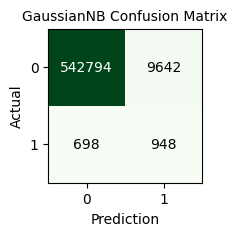

Training time: 219.6172239780426 seconds


In [ ]:
## GAUSSIAN NB

from sklearn.naive_bayes import GaussianNB


## create our naive bayes model
gaussian_model = GaussianNB()
## train our model
gaussian_model.fit(X_train_scaled, y_train)


## make prediction on the test data
y_pred_NB = gaussian_model.predict(X_test_scaled)

## make this in a dataframe
pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_NB})

## model evaluation
accuracy_NB = accuracy_score(y_test, y_pred_NB)

## confusion matrix
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)


print(accuracy_NB)
print(conf_mat_NB)


## confusion matrix plot NB
fig, ax = plot_confusion_matrix(conf_mat_NB, figsize=(2,2), cmap=plt.cm.Greens)
plt.xlabel('Prediction', fontsize = 10)
plt.ylabel('Actual', fontsize = 10)
plt.title('GaussianNB Confusion Matrix', fontsize = 10)
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time} seconds")

In [ ]:
print(pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_NB}))

         Actual  Predicted
1442460       0          0
5847267       0          0
2163940       0          0
2689116       0          0
1452693       0          0
...         ...        ...
4635707       0          0
494928        0          1
1775442       0          0
3159760       0          0
427712        0          0

[554082 rows x 2 columns]


In [ ]:
## PROBABILITIES NAIVE GaussianNB

# Calculate the predicted probabilities of fraud
probabilities_NB = gaussian_model.predict_proba(X_test_scaled)

# The second column of 'probabilities' contains the probability of fraud
probability_of_fraud_NB = probabilities_NB[:, 1] * 100

# Print the predicted probabilities
print("Predicted Probabilities of Fraud GaussianNB:")
print(probability_of_fraud_NB)

df_probabilities_NB = pd.DataFrame({'Probability of Fraud': probability_of_fraud_NB})
print(df_probabilities_NB)

Predicted Probabilities of Fraud GaussianNB:
[3.30582018e-04 1.38966528e-06 6.30387851e-07 ... 1.10341422e-06
 6.83887742e-07 7.39525716e-07]
        Probability of Fraud
0                       0.00
1                       0.00
2                       0.00
3                       0.00
4                       0.00
...                      ...
554077                  0.00
554078                 99.30
554079                  0.00
554080                  0.00
554081                  0.00

[554082 rows x 1 columns]


In [ ]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552436
           1       0.09      0.58      0.15      1646

    accuracy                           0.98    554082
   macro avg       0.54      0.78      0.57    554082
weighted avg       1.00      0.98      0.99    554082

